# Imports and prepare data for visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import copy
import os

In [2]:
# Two versions of the same data

## full_data includes the dataset with photo information, datetime, location, etc.
data = pd.read_csv(os.path.join("data", "gnomon_data.csv"))
data["Datetime"] = pd.to_datetime(data["Datetime"])


In [3]:
def timePerLoc(df):
    """
    Takes a dataframe. Calculates the amount of time spent at each location
    each time a building was entered.
    """
    newDF = pd.DataFrame()
    
    loc = df.loc[0, "Location"]
    start = df.loc[0, "Datetime"]
    day = df.loc[0, "Day"]
    count = 0
    
    for i in df.index.values[1:]:
        count += 1
        if (df.loc[i, "Location"] != loc) or (df.loc[i, "Day"] != day):
            diff = df.loc[i-1, "Datetime"] - start
            D = {"Location": loc, 
                 "Start": start, 
                 "Day": day, 
                 "Tot_min": (diff.seconds/60), 
                 "n_pics": count}
            newDF = newDF.append(D, ignore_index=True)
            
            loc = df.loc[i, "Location"]
            start = df.loc[i, "Datetime"]
            day = df.loc[i, "Day"]
            count = 0
        
    return newDF
            

In [4]:
# Set the colors of the nodes, which represent the locations of the photographs

locations = data['Location'].unique()
n_locations = data['Location'].unique().shape[0]
cmap = matplotlib.cm.get_cmap('viridis')

loc_colors  = dict()

for i in range(n_locations):
    loc_colors[locations[i]] = cmap(i / n_locations)
    

In [5]:
locs = timePerLoc(data)

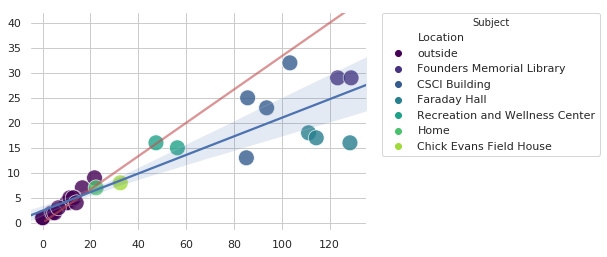

In [85]:
%matplotlib inline

sns.set_style('whitegrid')
# matplotlib.rcParams['font.family'] = 'sans-serif'
# matplotlib.rcParams['font.sans-serif'] = ['Garamond']

ax = sns.scatterplot(x="Tot_min", y="n_pics", hue="Location", data=locs, style="Location",
                     alpha=0.8, s=250, palette=loc_colors, markers={loc:'o' for loc in loc_colors.keys()} )


plt.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Plot the line of expectation (1 picture / 3 minutes)
x = np.linspace(1, 130, 130)
y = x / 3

plt.plot(x, y, alpha=0.6, color='r', linewidth=2.3)

# Plot the regression line
ax = sns.regplot(x="Tot_min", y="n_pics", data=locs, scatter=False)

sns.despine(left=True, right=True, bottom=True)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xlim([-5, 135])
ax.set_ylim([-1.5, 42])

# plt.show()

path = os.path.join('scatter_plots', 'scatter_locs.png')
plt.savefig(path, dpi=750, bbox_inches='tight', format='png', transparent=True)

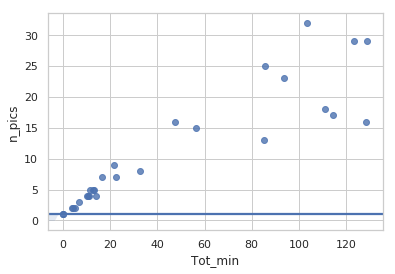

In [75]:
sns.regplot(x="Tot_min", y="n_pics", data=locs, logistic=True)